In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
import ast

df = pd.read_csv("nlp/datasets/amazon_reviews_preprocessed.csv")
df['reviewText'] = df['reviewText'].apply(lambda x: ast.literal_eval(x))
df['reviewText'].head()

0                                              [issue]
1    [purchased, device, worked, advertised, never,...
2    [work, expected, higher, capacity, think, made...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

In [10]:
from collections import Counter

all_words = [word for review in df['reviewText'] for word in review]
tf = pd.DataFrame(Counter(all_words).items(), columns=['words', 'tf'])
tf = tf.sort_values('tf', ascending=False).reset_index(drop=True)
tf.head()

,words,tf
0,card,5537
1,work,2044
2,phone,1909
3,gb,1756
4,great,1445


### Barplot

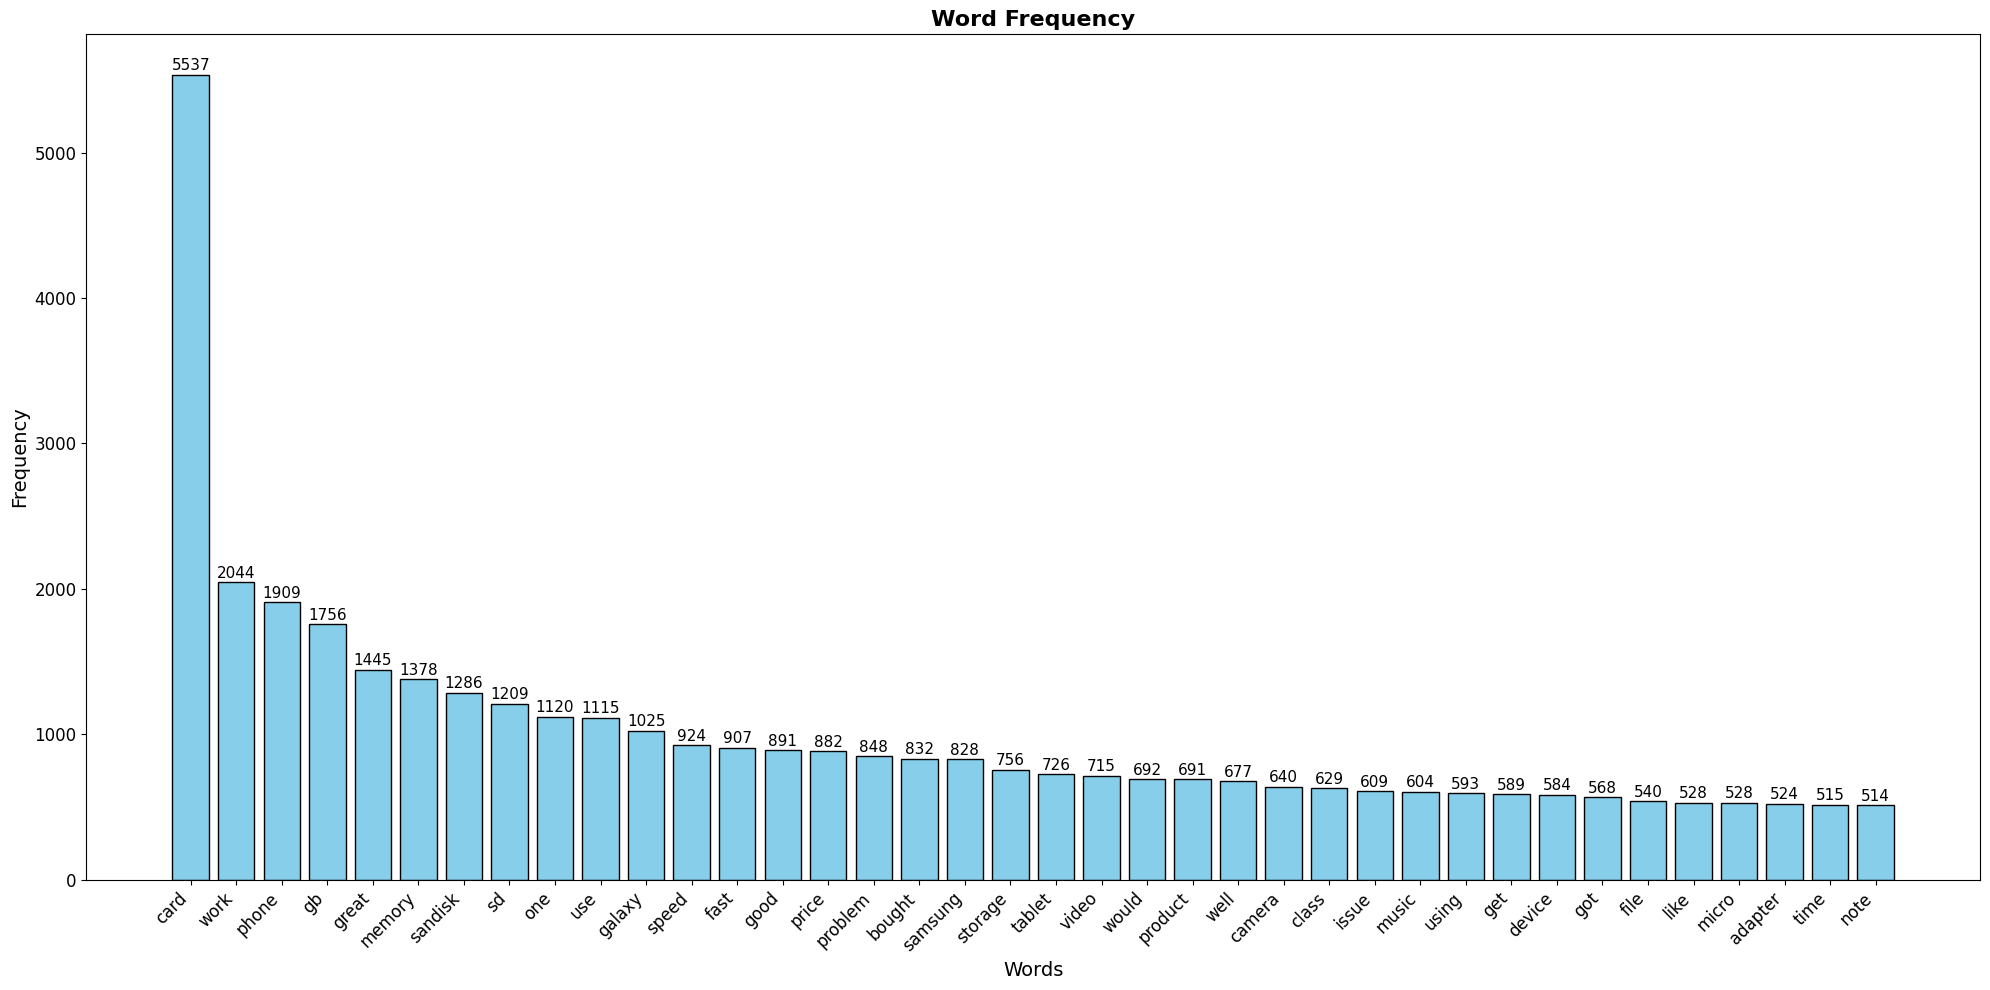

In [ ]:
top_words = tf[tf['tf'] >= 500]

plt.figure(figsize=(20,10))
bars = plt.bar(top_words['words'], top_words['tf'], color='skyblue', edgecolor='black')

plt.title("Word Frequency", fontsize=16, weight='bold')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, str(height), 
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

In [22]:
text = " ".join([" ".join(review) for review in df['reviewText']])
text

'issue purchased device worked advertised never much phone memory since download lot stuff brainer work expected higher capacity think made bit earlier version paint look clean think worked gb card went south one held pretty well since note update ive month zero issue since transferred note note card reliable bought retail packaging arrived legit envelope version asian like picture show arrived quickly bought retail packaging htc one lg optimus card working order probably best price youll get nice sd card mini storage doesnt anything else supposed purchased add additional storage microsoft surface pro tablet come gb supposed sandisk long standing reputation speaks phone never skip beat file transfer speedy corruption issue memory issue would expect sandisk brand great card precious file slightly cheaper piece crap lose everything spending extra couple buck trusted product go good qa hard believe affordable digital become gb device one quarter postage stamp would less generation picked 

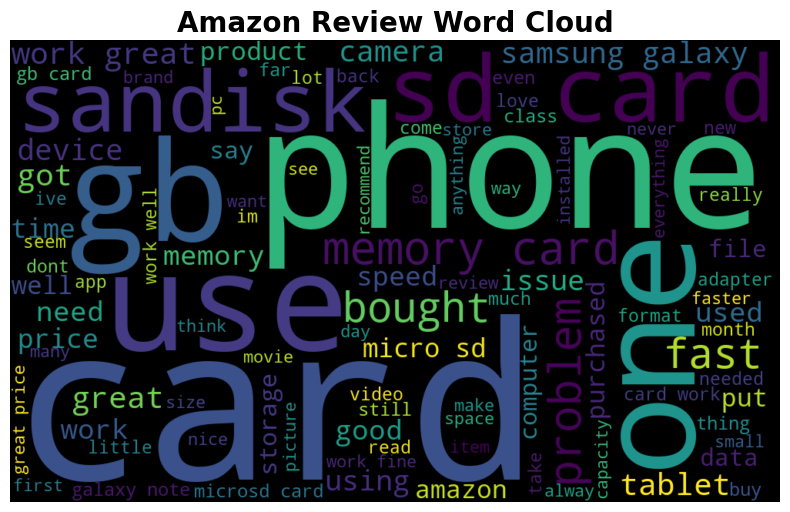

In [27]:
wc = WordCloud(
    width=1000, 
    height=600, 
    background_color='black', 
    colormap='viridis',  
    max_words=100,
    contour_width=1, 
    contour_color='steelblue'
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Amazon Review Word Cloud", fontsize=20, weight='bold')
plt.show()

In [31]:
wc.to_file("nlp/visualizations/wordcloud_amazon_reviews.png")